## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


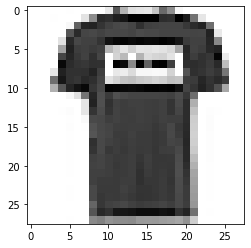

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8384 - accuracy: 0.7243 - val_loss: 0.5556 - val_accuracy: 0.8056


Epoch 2/25


60/60 - 1s - loss: 0.5023 - accuracy: 0.8295 - val_loss: 0.4732 - val_accuracy: 0.8336


Epoch 3/25


60/60 - 1s - loss: 0.4444 - accuracy: 0.8476 - val_loss: 0.4321 - val_accuracy: 0.8499


Epoch 4/25


60/60 - 1s - loss: 0.4126 - accuracy: 0.8583 - val_loss: 0.4123 - val_accuracy: 0.8566


Epoch 5/25


60/60 - 1s - loss: 0.3893 - accuracy: 0.8658 - val_loss: 0.3954 - val_accuracy: 0.8605


Epoch 6/25


60/60 - 1s - loss: 0.3719 - accuracy: 0.8705 - val_loss: 0.3848 - val_accuracy: 0.8664


Epoch 7/25


60/60 - 1s - loss: 0.3597 - accuracy: 0.8741 - val_loss: 0.3768 - val_accuracy: 0.8680


Epoch 8/25


60/60 - 1s - loss: 0.3418 - accuracy: 0.8808 - val_loss: 0.3603 - val_accuracy: 0.8735


Epoch 9/25


60/60 - 1s - loss: 0.3295 - accuracy: 0.8847 - val_loss: 0.3576 - val_accuracy: 0.8730


Epoch 10/25


60/60 - 1s - loss: 0.3236 - accuracy: 0.8859 - val_loss: 0.3515 - val_accuracy: 0.8763


Epoch 11/25


60/60 - 1s - loss: 0.3146 - accuracy: 0.8889 - val_loss: 0.3370 - val_accuracy: 0.8789


Epoch 12/25


60/60 - 1s - loss: 0.3068 - accuracy: 0.8906 - val_loss: 0.3341 - val_accuracy: 0.8813


Epoch 13/25


60/60 - 1s - loss: 0.2963 - accuracy: 0.8945 - val_loss: 0.3408 - val_accuracy: 0.8809


Epoch 14/25


60/60 - 1s - loss: 0.2860 - accuracy: 0.8984 - val_loss: 0.3362 - val_accuracy: 0.8799


Epoch 15/25


60/60 - 1s - loss: 0.2831 - accuracy: 0.8995 - val_loss: 0.3349 - val_accuracy: 0.8813


Epoch 16/25


60/60 - 1s - loss: 0.2738 - accuracy: 0.9023 - val_loss: 0.3234 - val_accuracy: 0.8843


Epoch 17/25


60/60 - 1s - loss: 0.2709 - accuracy: 0.9021 - val_loss: 0.3380 - val_accuracy: 0.8800


Epoch 18/25


60/60 - 1s - loss: 0.2663 - accuracy: 0.9054 - val_loss: 0.3222 - val_accuracy: 0.8831


Epoch 19/25


60/60 - 1s - loss: 0.2591 - accuracy: 0.9075 - val_loss: 0.3311 - val_accuracy: 0.8813


Epoch 20/25


60/60 - 1s - loss: 0.2507 - accuracy: 0.9103 - val_loss: 0.3163 - val_accuracy: 0.8853


Epoch 21/25


60/60 - 1s - loss: 0.2495 - accuracy: 0.9110 - val_loss: 0.3139 - val_accuracy: 0.8885


Epoch 22/25


60/60 - 1s - loss: 0.2407 - accuracy: 0.9145 - val_loss: 0.3154 - val_accuracy: 0.8860


Epoch 23/25


60/60 - 1s - loss: 0.2365 - accuracy: 0.9163 - val_loss: 0.3186 - val_accuracy: 0.8862


Epoch 24/25


60/60 - 1s - loss: 0.2326 - accuracy: 0.9173 - val_loss: 0.3077 - val_accuracy: 0.8882


Epoch 25/25


60/60 - 1s - loss: 0.2286 - accuracy: 0.9185 - val_loss: 0.3258 - val_accuracy: 0.8839


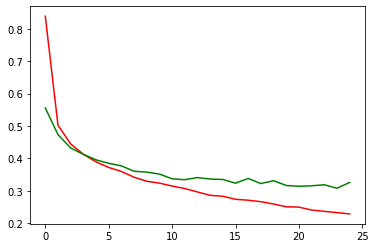

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

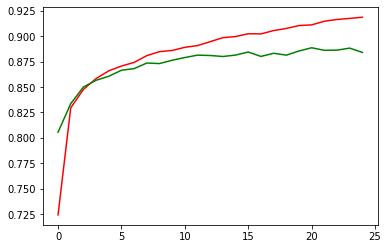

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

 32/313 [==>...........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8789

 63/313 [=====>........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8854

 96/313 [========>.....................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8805



128/313 [===========>..................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8760

159/313 [==============>...............] - ETA: 0s - loss: 0.3546 - accuracy: 0.8742

188/313 [=================>............] - ETA: 0s - loss: 0.3630 - accuracy: 0.8725

219/313 [===================>..........] - ETA: 0s - loss: 0.3589 - accuracy: 0.8740



252/313 [=======================>......] - ETA: 0s - loss: 0.3525 - accuracy: 0.8750



285/313 [==========================>...] - ETA: 0s - loss: 0.3523 - accuracy: 0.8766



313/313 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8777


準確度 = 87.8
